# **Libraries**

In [7]:
import tensorflow as tf 
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential,  Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input,BatchNormalization, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, History, TensorBoard,ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

# **Import EMG Feature (CSV file)**

In [8]:
df = pd.read_csv(r"C:\Users\hpalm\Downloads\p1 (1).csv")
df

Canal_1   Canal_2   Canal_3   Canal_4   Canal_5   Canal_6   Canal_7  \
0      0.031250 -0.335938 -0.195312 -0.031250  0.078125  0.031250  0.078125   
1     -0.117188  0.304688  0.453125  0.140625 -0.070312 -0.007812  0.015625   
2     -0.101562 -0.320312 -0.117188  0.109375  0.125000  0.023438 -0.015625   
3     -0.359375 -0.132812 -0.570312 -0.273438 -0.093750 -0.078125 -0.085938   
4      0.281250  0.187500  0.570312  0.289062  0.101562  0.031250  0.031250   
...         ...       ...       ...       ...       ...       ...       ...   
35995  0.000000 -0.007812 -0.023438 -0.007812 -0.007812 -0.015625 -0.007812   
35996  0.000000 -0.015625 -0.007812  0.007812 -0.007812 -0.007812 -0.007812   
35997 -0.007812 -0.007812  0.000000  0.000000 -0.007812 -0.007812  0.000000   
35998  0.000000 -0.007812 -0.007812  0.000000 -0.007812 -0.007812 -0.023438   
35999 -0.015625  0.007812  0.007812 -0.007812 -0.023438 -0.015625 -0.031250   

        Canal_8  Clase  
0      0.007812      0  
1     -0.054688      0  
2      0.007812      0  
3     -0.062500      0  
4     -0.093750      0  
...         ...    ...  
35995 -0.007812      5  
35996  0.007812      5  
35997 -0.015625      5  
35998 -0.007812      5  
35999  0.000000      5  

[36000 rows x 9 columns]

# **Train and Test set**

In [9]:
X = df.iloc[:,:7].values    # features matrix 
y = df.iloc[:,[8]].values        # target variable

In [10]:
# Split data into train, test and validatio sets 

X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=0, stratify=y)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train,test_size=0.2,random_state=0, stratify=y_train)

print('Testing data shape : ', X_test.shape, y_test.shape)
print('Training data shape : ', X_train.shape, y_train.shape)
print('validation data shape : ', X_val.shape, y_val.shape)

Testing data shape :  (7200, 7) (7200, 1)
Training data shape :  (23040, 7) (23040, 1)
validation data shape :  (5760, 7) (5760, 1)


# **Build SVM and train**

# **Confusion Matrix**

In [140]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming clf is your trained SVM model and X_test, y_test are your test data and labels, respectively
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in range(6)],
                  columns = [i for i in range(6)])

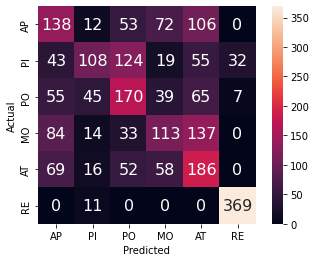

In [141]:
labels=["AP", "PI", "PO", "MO", "AT", "RE"] #Con Reposo
#labels=["AP", "PI", "PO", "MO", "AT"] #Sin Reposo
df_cm = pd.DataFrame(cm, labels, labels)
ax = sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, square=True, cbar=True, fmt='g')
ax.set_ylim(0, 6) 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
ax.invert_yaxis() 
plt.show()

# **Metrics**

In [142]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy: ', "%.2f" % (accuracy*100))
print('F1 : ', "%.2f" % (precision*100))
print('Recall_Score: ', "%.2f" % (recall*100))
print('Precision : ', "%.2f" % (f1*100))

Accuracy:  47.44
F1 :  48.17
Recall_Score:  47.44
Precision :  46.86


In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.36      0.36       381
           1       0.52      0.28      0.37       381
           2       0.39      0.45      0.42       381
           3       0.38      0.30      0.33       381
           4       0.34      0.49      0.40       381
           5       0.90      0.97      0.94       380

    accuracy                           0.47      2285
   macro avg       0.48      0.47      0.47      2285
weighted avg       0.48      0.47      0.47      2285

